In [1]:
import json
import datetime

In [2]:
with open('analytics\\1\\dump1.json', 'r') as f:
    data1 = json.load(f)
with open('analytics\\2\\dump2_2.json', 'r') as f:
    data2 = json.load(f)
with open('analytics\\3\\dump3_3.json', 'r') as f:
    data3 = json.load(f)


In [3]:
def getstats(data):
    bytesReceived_in_bits = []
    timestamps=[]
    for j in data['PeerConnections']:
        stats=data['PeerConnections'][j]['stats']
        for i in stats:
            if "statsType" in stats[i]:
                if stats[i]['statsType'] == 'inbound-rtp':
                    if 'bytesReceived_in_bits' in i:
                        bytesReceived_in_bits=stats[i]
                    if 'lastPacketReceivedTimestamp' in i:
                        timestamps=stats[i]
    print(bytesReceived_in_bits)
    try:
        bytesReceived_in_bits['values']=eval(bytesReceived_in_bits['values'])
    except:
        pass
    try:
        timestamps['values']=eval(timestamps['values'])
    except:
        pass
    times=[0]
    for i in range(len(timestamps['values'])):
        date_time_obj = datetime.datetime.strptime(timestamps['values'][i], '%m/%d/%Y, %I:%M:%S %p')
        timestamps['values'][i]=date_time_obj
        if i>0:
            times.append((timestamps['values'][i]-timestamps['values'][0]).seconds)
    return bytesReceived_in_bits,times



In [4]:
bytesReceived_in_bits1,timestamps1=getstats(data1)
bytesReceived_in_bits2,timestamps2=getstats(data2)
bytesReceived_in_bits3,timestamps3=getstats(data3)
print(bytesReceived_in_bits2['values'])

{'startTime': '2024-10-21T21:45:36.071Z', 'endTime': '2024-10-21T21:45:52.345Z', 'statsType': 'inbound-rtp', 'values': '[0,299327.5411871774,511239.53671153006,540433.3334264972,444968.2610115213,380226.3727503629,572168.5508515945,378973.1401367191,464327.7708921628,492832.3371648302,500580.52709053457,518855.52704794623,467742.5738834803,693331.9105209897,673331.9645927607,701728.2824918624,766791.875707558,792697.5880809729]'}
{'startTime': '2024-10-21T21:46:35.065Z', 'endTime': '2024-10-21T21:47:10.338Z', 'statsType': 'inbound-rtp', 'values': '[0,207522.71161774898,396591.2635240029,383232.77678052033,511434.62744884274,531427.1427948999,461068.1534378405,533975.5911418598,638069.1299877239,663106.1405382582,554171.069739462,682926.155063376,512783.2757974742,732606.4696739197,565374.622015359,542774.2152039936,465196.63137670944,506313.1450806608,595276.6108080142,589815.9904776443,736713.2886672631,663037.7071536622,632235.7126873037,592680.5937739795,544825.9525342416,535584.142

In [5]:
minlength=min(timestamps1[-1],min(timestamps2[-1],timestamps3[-1]))
timestamps1=[i for i in timestamps1 if i<=minlength]
timestamps2=[i for i in timestamps2 if i<=minlength]
timestamps3=[i for i in timestamps3 if i<=minlength]
bytesReceived_in_bits1['values']=bytesReceived_in_bits1['values'][:len(timestamps1)]
bytesReceived_in_bits2['values']=bytesReceived_in_bits2['values'][:len(timestamps2)]
bytesReceived_in_bits3['values']=bytesReceived_in_bits3['values'][:len(timestamps3)]

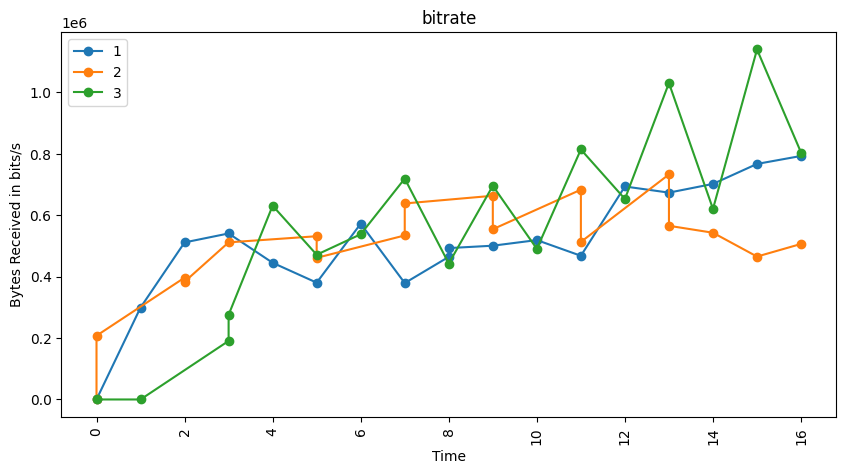

In [8]:
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(timestamps1, bytesReceived_in_bits1['values'],marker='o')  
plt.plot(timestamps2, bytesReceived_in_bits2['values'],marker='o')
plt.plot(timestamps3, bytesReceived_in_bits3['values'],marker='o')
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Bytes Received in bits/s')
plt.legend(['1','2','3'])
plt.title("bitrate")
plt.show()